<a href="https://colab.research.google.com/github/AlexFraisl/Crop-Disease-Model-HSLU/blob/main/Crop_Notebook2_Brownspot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import os
from PIL import Image

# GitHub repository URL
github_repo_url = "https://github.com/AlexFraisl/Crop-Disease-Model-HSLU.git"
local_data_dir = "/content/image_data_new"

# Clone the repository
!git clone {github_repo_url} {local_data_dir}

# Define training and validation paths after cloning
training_folder = os.path.join(local_data_dir, "Dataset/archive/Train/American Bollworm on Cotton")
validation_folder = os.path.join(local_data_dir, "Dataset/archive/Validation/American Bollworm on Cotton")

def analyze_image_dataset(folder_path):
    image_data = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Add other image extensions if needed
            filepath = os.path.join(folder_path, filename)
            try:
                image = Image.open(filepath)
                width, height = image.size
                image_data.append({
                    "filename": filename,
                    "width": width,
                    "height": height,
                    "format": image.format
                })
            except IOError:
                print(f"Error opening {filename}")

    return pd.DataFrame(image_data)

# Check if training and validation folders exist
if os.path.exists(training_folder):
    # Analyze the training set
    training_df = analyze_image_dataset(training_folder)
    print("Training Set Analysis:")
    print(training_df.describe())
    print(training_df.info())
else:
    print("Training folder not found!")

if os.path.exists(validation_folder):
    # Analyze the validation set
    validation_df = analyze_image_dataset(validation_folder)
    print("\nValidation Set Analysis:")
    print(validation_df.describe())
    print(validation_df.info())
else:
    print("Validation folder not found!")


Cloning into '/content/image_data_new'...
remote: Enumerating objects: 15317, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 15317 (delta 0), reused 7 (delta 0), pack-reused 15310 (from 1)
Receiving objects: 100% (15317/15317), 1.94 GiB | 30.17 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Updating files: 100% (18628/18628), done.
Training Set Analysis:
             width       height
count    56.000000    56.000000
mean   1157.267857   907.107143
std    1297.066445   920.847963
min     220.000000   162.000000
25%     600.000000   496.500000
50%     768.000000   671.500000
75%    1285.000000   942.000000
max    7360.000000  4912.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  56 non-null     object
 1   width     56 non-null     int64 
 2   height    56 non-null     in

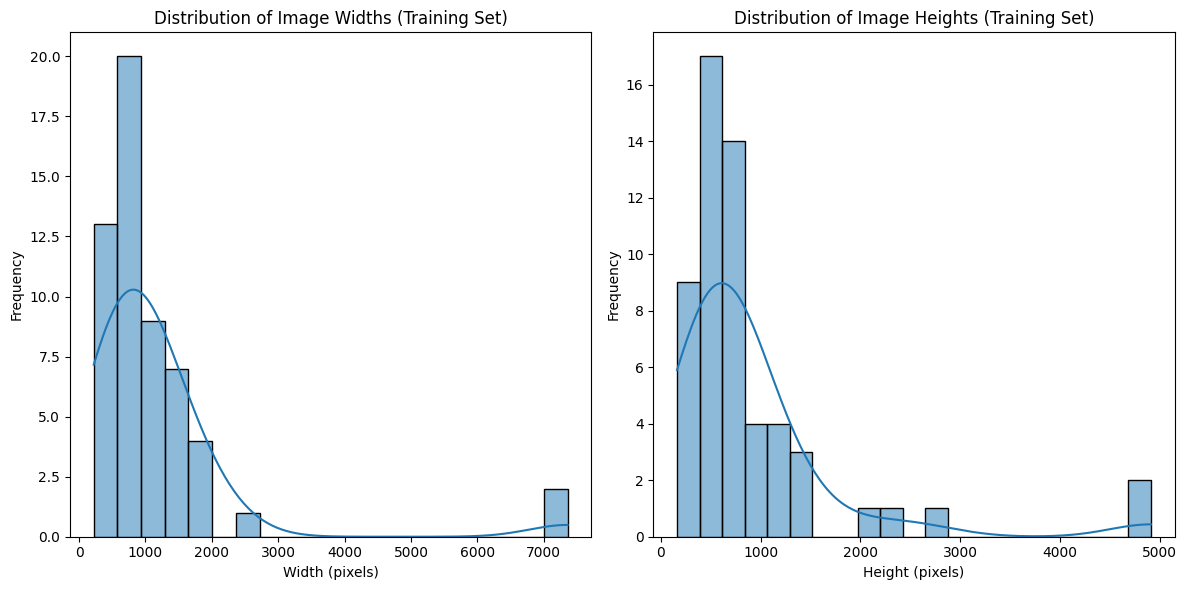

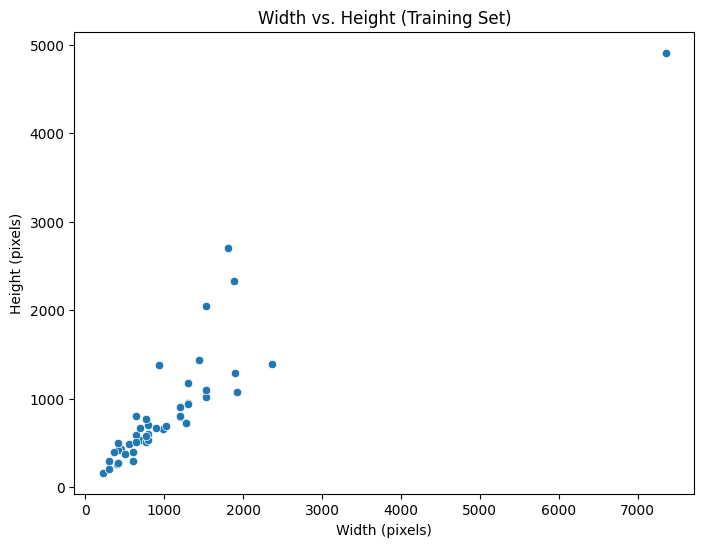

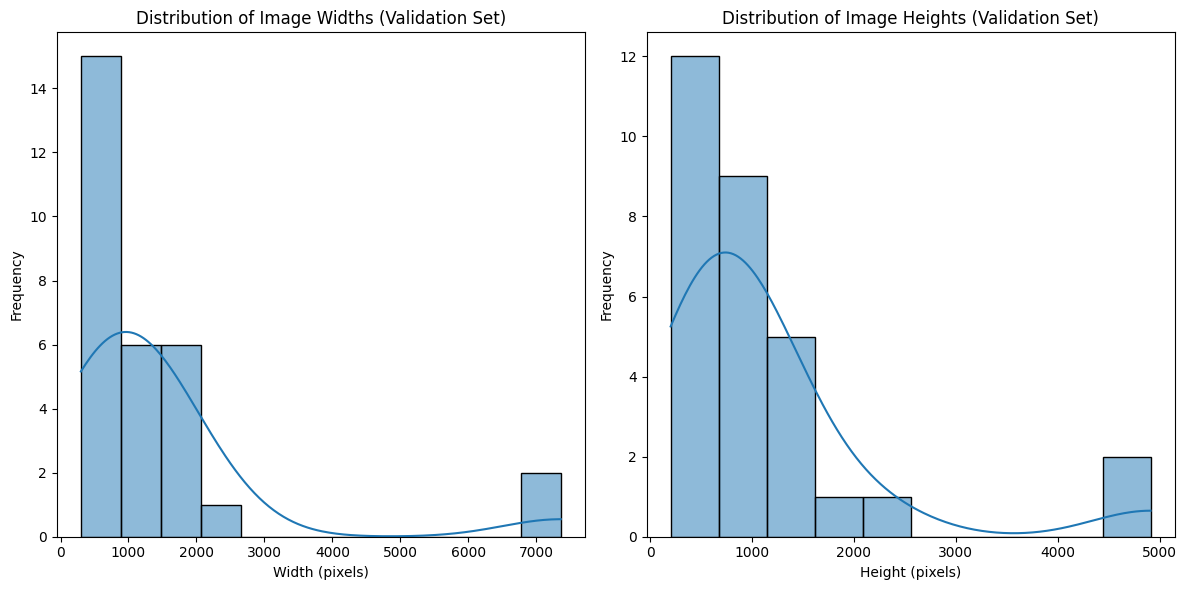

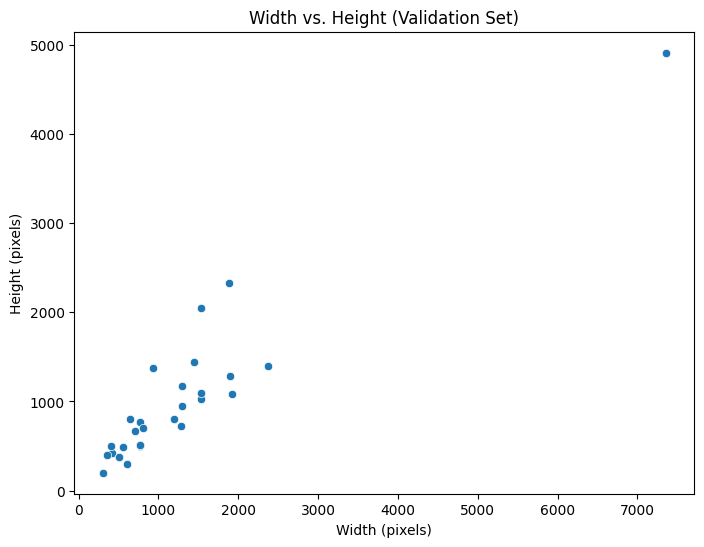

In [8]:
# prompt: visualisiere die traingsdaten für die größenverteilung

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming training_df is already created from the previous code

if 'training_df' in locals():
    plt.figure(figsize=(12, 6))

    # Distribution of image widths
    plt.subplot(1, 2, 1)
    sns.histplot(training_df['width'], kde=True)
    plt.title('Distribution of Image Widths (Training Set)')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Frequency')

    # Distribution of image heights
    plt.subplot(1, 2, 2)
    sns.histplot(training_df['height'], kde=True)
    plt.title('Distribution of Image Heights (Training Set)')
    plt.xlabel('Height (pixels)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Scatter plot of width vs. height
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='width', y='height', data=training_df)
    plt.title('Width vs. Height (Training Set)')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Height (pixels)')
    plt.show()

if 'validation_df' in locals():
    plt.figure(figsize=(12, 6))

    # Distribution of image widths
    plt.subplot(1, 2, 1)
    sns.histplot(validation_df['width'], kde=True)
    plt.title('Distribution of Image Widths (Validation Set)')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Frequency')

    # Distribution of image heights
    plt.subplot(1, 2, 2)
    sns.histplot(validation_df['height'], kde=True)
    plt.title('Distribution of Image Heights (Validation Set)')
    plt.xlabel('Height (pixels)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Scatter plot of width vs. height
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='width', y='height', data=validation_df)
    plt.title('Width vs. Height (Validation Set)')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Height (pixels)')
    plt.show()

In [9]:
# prompt: please resize all pictures to 150x150

def resize_images(folder_path, target_size=(150, 150)):
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            filepath = os.path.join(folder_path, filename)
            try:
                img = Image.open(filepath)
                img = img.resize(target_size)
                img.save(filepath)  # Overwrite the original image
            except IOError:
                print(f"Error resizing {filename}")

# Resize images in the training set
if os.path.exists(training_folder):
    resize_images(training_folder)
    print("Training images resized.")
else:
    print("Training folder not found!")

# Resize images in the validation set
if os.path.exists(validation_folder):
    resize_images(validation_folder)
    print("Validation images resized.")
else:
    print("Validation folder not found!")

Training images resized.
Validation images resized.


In [10]:
# Check if training and validation folders exist
if os.path.exists(training_folder):
    # Analyze the training set
    training_df = analyze_image_dataset(training_folder)
    print("Training Set Analysis:")
    print(training_df.describe())
    print(training_df.info())
else:
    print("Training folder not found!")

if os.path.exists(validation_folder):
    # Analyze the validation set
    validation_df = analyze_image_dataset(validation_folder)
    print("\nValidation Set Analysis:")
    print(validation_df.describe())
    print(validation_df.info())
else:
    print("Validation folder not found!")

Training Set Analysis:
       width  height
count   56.0    56.0
mean   150.0   150.0
std      0.0     0.0
min    150.0   150.0
25%    150.0   150.0
50%    150.0   150.0
75%    150.0   150.0
max    150.0   150.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  56 non-null     object
 1   width     56 non-null     int64 
 2   height    56 non-null     int64 
 3   format    56 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.9+ KB
None

Validation Set Analysis:
       width  height
count   30.0    30.0
mean   150.0   150.0
std      0.0     0.0
min    150.0   150.0
25%    150.0   150.0
50%    150.0   150.0
75%    150.0   150.0
max    150.0   150.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filen

       filename     avg_red   avg_green    avg_blue       hue  lightness  \
0   Image_7.jpg  111.099067  121.727733   67.645556  0.199421   0.371320   
1  Image_24.jpg  139.462622  133.754133   76.801778  0.151483   0.424048   
2  Image_12.jpg  161.416889  168.069156  166.052222  0.449468   0.646051   
3   Image_9.jpg  123.611600  143.873467  107.290178  0.258976   0.492478   
4  Image_49.jpg   85.083956  117.674622   49.137111  0.245919   0.327082   

   saturation  
0    0.285585  
1    0.289742  
2    0.036852  
3    0.145655  
4    0.410867  


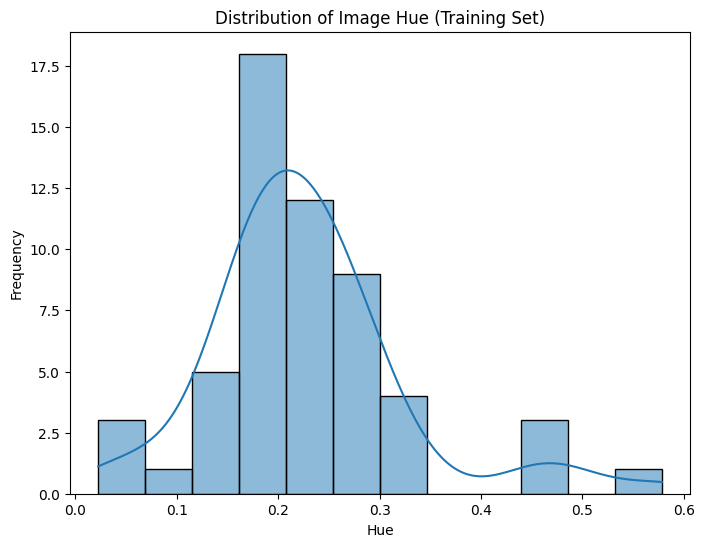

       filename     avg_red   avg_green    avg_blue       hue  lightness  \
0   Image_7.jpg  111.099067  121.727733   67.645556  0.199421   0.371320   
1  Image_24.jpg  139.462622  133.754133   76.801778  0.151483   0.424048   
2  Image_12.jpg  161.416889  168.069156  166.052222  0.449468   0.646051   
3   Image_9.jpg  123.611600  143.873467  107.290178  0.258976   0.492478   
4  Image_10.jpg  132.239867  136.722533  117.849956  0.206254   0.499162   

   saturation  
0    0.285585  
1    0.289742  
2    0.036852  
3    0.145655  
4    0.074134  
Number of images in the brown-green range: 45


In [11]:
# prompt: wie kann ich die verteilung der fotos der farben von braun zu grün analysieren?

import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (Your existing code)

def analyze_image_colors(folder_path):
    color_data = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            filepath = os.path.join(folder_path, filename)
            try:
                image = Image.open(filepath).convert("RGB")  # Ensure RGB format
                image_array = np.array(image)

                # Calculate average color for demonstration (you can refine this)
                avg_color = np.mean(image_array.reshape(-1, 3), axis=0)

                # Convert RGB to HLS for better analysis
                hls_color = colorsys.rgb_to_hls(avg_color[0]/255, avg_color[1]/255, avg_color[2]/255)

                color_data.append({
                    "filename": filename,
                    "avg_red": avg_color[0],
                    "avg_green": avg_color[1],
                    "avg_blue": avg_color[2],
                    "hue": hls_color[0],
                    "lightness": hls_color[1],
                    "saturation": hls_color[2]
                })
            except IOError:
                print(f"Error opening {filename}")
    return pd.DataFrame(color_data)

import colorsys

# ... (Your existing code)

if os.path.exists(training_folder):
    training_color_df = analyze_image_colors(training_folder)
    print(training_color_df.head())  # Inspect the DataFrame

    # Plotting Hue distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(training_color_df['hue'], kde=True)
    plt.title('Distribution of Image Hue (Training Set)')
    plt.xlabel('Hue')
    plt.ylabel('Frequency')
    plt.show()

    # You can add more analysis here, such as:
    # - Plotting lightness and saturation distributions
    # - Scatter plots to compare hue vs. lightness/saturation
    # - Analyze the distribution with respect to specific hue ranges (e.g. brown to green)
    # - Consider using KMeans clustering to identify dominant colors

if os.path.exists(validation_folder):
    validation_color_df = analyze_image_colors(validation_folder)
    print(validation_color_df.head())
    # Perform similar analysis for the validation set

# Example of how to filter for brown to green (approximate hue range)
# Assuming 0.1 to 0.3 represents brown to green in HLS
brown_green_images = training_color_df[(training_color_df['hue'] >= 0.1) & (training_color_df['hue'] <= 0.3)]
print("Number of images in the brown-green range:", len(brown_green_images))

In [13]:
# prompt: wie finde ich die anzahl der braunen flecken auf einem Blatt heraus nur für training set?

# ... (Your existing code)

def count_brown_spots(image_path, brown_lower_bound=(10, 50, 50), brown_upper_bound=(30, 255, 255)):
    """Counts brown spots in an image using HSV color thresholding."""
    try:
        img = Image.open(image_path)
        img = img.convert('RGB')  # Ensure image is in RGB format
        img_array = np.array(img)
        hsv_image = cv2.cvtColor(img_array, cv2.COLOR_RGB2HSV)

        brown_mask = cv2.inRange(hsv_image, brown_lower_bound, brown_upper_bound)
        num_brown_pixels = np.count_nonzero(brown_mask)
        # Further refine counting by removing small noise, etc.
        return num_brown_pixels
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return 0  # Return 0 if there is an error

# Initialize an empty list to store the brown spot counts
brown_spot_counts = []

# Iterate through the training set images and count the brown spots in each image
if os.path.exists(training_folder):
    for filename in os.listdir(training_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            filepath = os.path.join(training_folder, filename)
            brown_spot_count = count_brown_spots(filepath)
            brown_spot_counts.append(brown_spot_count)
            #print(f"Number of brown spots in {filename}: {brown_spot_count}")

    # Add the brown spot counts to the training_df DataFrame
    training_df['brown_spots'] = brown_spot_counts
    print(training_df.head()) #print dataframe with new column
    print("Average number of brown spots in training set:", np.mean(brown_spot_counts)) #print average
else:
    print("Training folder not found!")



       filename  width  height format  brown_spots
0   Image_7.jpg    150     150   JPEG         5518
1  Image_24.jpg    150     150   JPEG         4254
2  Image_12.jpg    150     150   JPEG         1880
3   Image_9.jpg    150     150   JPEG         3380
4  Image_49.jpg    150     150   JPEG         3916
Average number of brown spots in training set: 3756.7321428571427


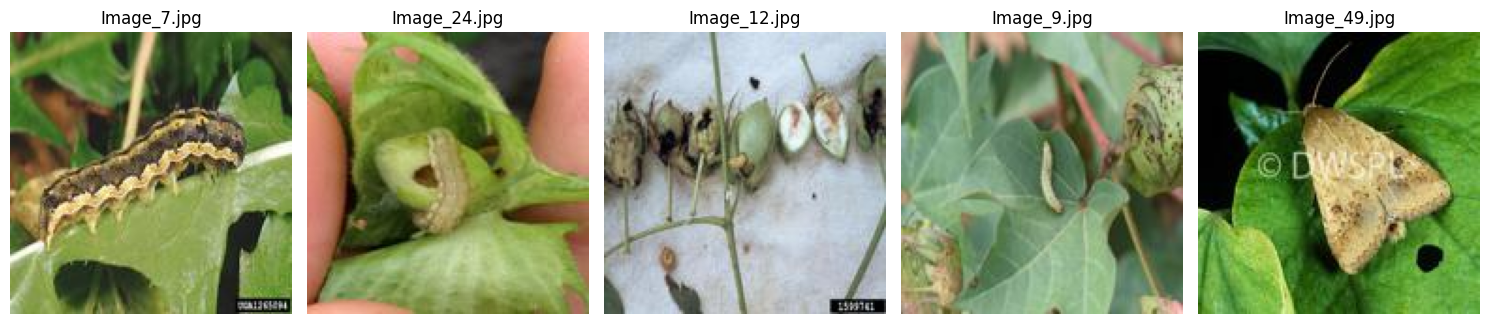

In [14]:
# prompt: Kannst du die top 5 bilder anzeigen?

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Assuming training_folder is defined from the previous code
if os.path.exists(training_folder):
    image_files = [f for f in os.listdir(training_folder) if os.path.isfile(os.path.join(training_folder, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    num_images_to_show = min(5, len(image_files))  # Show up to 5 images

    plt.figure(figsize=(15, 5))  # Adjust figure size for better display

    for i in range(num_images_to_show):
        img_path = os.path.join(training_folder, image_files[i])
        try:
            img = mpimg.imread(img_path)
            plt.subplot(1, num_images_to_show, i + 1)
            plt.imshow(img)
            plt.title(image_files[i])
            plt.axis('off')
        except Exception as e:
            print(f"Error displaying image {image_files[i]}: {e}")

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()
else:
    print("Training folder not found.")